### 📘 Relación entre la Distribución Normal y la Log-Normal

La **distribución log-normal** está directamente relacionada con la **distribución normal** a través de una transformación logarítmica.

#### 🧠 Definición:
Una variable aleatoria $X$ sigue una **distribución log-normal** si el logaritmo natural de $X$ sigue una distribución normal:

$$
\ln(X) \sim \mathcal{N}(\mu, \sigma^2)
$$

Esto significa que si tomamos el logaritmo natural de una variable log-normal, obtenemos una variable normalmente distribuida.

#### 🔁 Transformaciones:

- Si $ Z \sim \mathcal{N}(\mu, \sigma^2) $, entonces $ X = e^Z \sim \text{LogNormal}(\mu, \sigma^2) $

- Inversamente, si $ X \sim \text{LogNormal}(\mu, \sigma^2) $, entonces:

$$
\ln(X) \sim \mathcal{N}(\mu, \sigma^2)
$$

> ⚠️ Nota: En la notación matemática estándar, los parámetros de la distribución log-normal son la media y la **varianza** del logaritmo de la variable, es decir, de $ \ln X $.
>
> Algunas librerías como `scipy.stats.lognorm` usan la **desviación estándar** $ \sigma $ como parámetro (llamada `s`), por lo que hay que ajustar con cuidado:
>
> - `mu = log(scale)`
> - `sigma = s`  → donde `s` representa la desviación estándar del logaritmo


#### 📐 Parámetros:
- $\mu$: media de la variable $\ln(X)$
- $\sigma$: desviación estándar de $\ln(X)$
- En bibliotecas como `scipy.stats.lognorm`, el parámetro `scale` se define como:

$$
\text{scale} = e^\mu
$$

#### 📊 Características:
- La log-normal está **definida solo para valores positivos**: $X > 0$
- Tiene una **forma asimétrica**, con una **cola larga a la derecha**
- A menudo se usa para modelar variables positivas con crecimiento multiplicativo, como:
  - Precios de activos financieros
  - Tiempos de espera
  - Ingresos
  - Tamaños de partículas o poblaciones

#### 🧪 Intuición:
Si los logaritmos de tus datos parecen seguir una distribución normal, entonces tus datos probablemente sigan una distribución log-normal.

### ⚠️ Notación y Convenciones en la Distribución Log-Normal

Es importante tener en cuenta cómo se interpretan los parámetros $\mu$ y $\sigma$ en la distribución log-normal.

#### 📐 Parámetros estándar:
Cuando escribimos:

$$
X \sim \text{LogNormal}(\mu, \sigma)
$$

Esto significa que:

- $\mu$ es la **media del logaritmo natural** de $X$: $\mu = \mathbb{E}[\ln X]$
- $\sigma$ es la **desviación estándar del logaritmo natural** de $X$: $\sigma = \text{std}(\ln X)$

#### ⚠️ Confusión común:
A veces se escribe incorrectamente:

$$
X \sim \text{LogNormal}(\mu, \sigma^2)
$$

Esto puede dar a entender que el segundo parámetro es la **varianza**, pero en la práctica, **la notación estándar utiliza $\sigma$ (la desviación estándar)**, no $\sigma^2$.

#### 📦 En bibliotecas como SciPy:
El método `scipy.stats.lognorm(s, scale=exp(mu))` interpreta:

- `s`: como $\sigma$ (la desviación estándar del logaritmo)
- `scale`: como $e^\mu$

Por tanto, la forma correcta de definir una distribución log-normal en código sería:

```python
from scipy.stats import lognorm

mu = 1.0
sigma = 0.5
dist = lognorm(s=sigma, scale=np.exp(mu))
```
### 📊 Comparación de Parámetros: Distribución Normal vs. Log-Normal

| Característica                    | Distribución Normal                            | Distribución Log-Normal                          |
|----------------------------------|-------------------------------------------------|--------------------------------------------------|
| Variable                         | $Z$                                             | $X = e^Z$ donde $Z \sim \mathcal{N}(\mu, \sigma^2)$ |
| Soporte                          | $(-\infty, \infty)$                             | $(0, \infty)$                                     |
| Media                            | $\mu$                                           | $\exp\left(\mu + \frac{\sigma^2}{2}\right)$       |
| Mediana                          | $\mu$                                           | $\exp(\mu)$                                       |
| Varianza                         | $\sigma^2$                                      | $\left[\exp(\sigma^2) - 1\right] \exp(2\mu + \sigma^2)$ |
| Parámetros usados                | $\mu$, $\sigma$ (desviación estándar)           | $\mu$, $\sigma$ del logaritmo de $X$             |
| En `scipy.stats.norm`            | `loc=mu`, `scale=sigma`                        | —                                                |
| En `scipy.stats.lognorm`         | `s=sigma`, `scale=np.exp(mu)`                  |                                                   |
| Transformación inversa           | —                                               | $\ln(X) \sim \mathcal{N}(\mu, \sigma^2)$          |
| Forma de la distribución         | Simétrica                                       | Sesgada (asimétrica a la derecha)                |

---

### 📘 ¿Por qué se escribe $\mathcal{N}(\mu, \sigma^2)$ si en código se pasa $\sigma$?

Es común ver que la distribución normal se escribe así:

$$
Z \sim \mathcal{N}(\mu, \sigma^2)
$$

Esto indica que **la variable $Z$ tiene media $\mu$ y varianza $\sigma^2$**.

---

#### ⚙️ Pero en código...

Cuando usamos librerías como `scipy.stats.norm` o `numpy.random.normal`, el parámetro que se pasa es la **desviación estándar $\sigma$**, no la varianza.

```python
from scipy.stats import norm

mu = 0
sigma = 2  # desviación estándar

# Esto representa N(0, 4) ya que 2^2 = 4
norm.pdf(x, loc=mu, scale=sigma)
```
---


#### 🔁 Visualización en código de:
- Si $Z \sim \mathcal{N}(\mu, \sigma^2)$, entonces $X = e^Z \sim \text{LogNormal}(\mu, \sigma^2)$
- Inversamente, si $X \sim \text{LogNormal}(\mu, \sigma^2)$, entonces $\ln(X) \sim \mathcal{N}(\mu, \sigma^2)$  

La fórmula de la función de densidad de la normal es:

$
f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 }
$

Donde:
- $ \mu $ es la **media** (centro de la distribución).
- $ \sigma $ es la **desviación estándar** (ancho o dispersión).
- $ \sigma^2 $ es la **varianza**.

La fórmula de la función de densidad de la log-normal es:

$
f(x; \mu, \sigma) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left( -\frac{(\ln x - \mu)^2}{2\sigma^2} \right), \quad x > 0
$  

Reordenando la función para mejor comparación visual con la normal:  

$
f(x; \mu, \sigma) = \frac{1}{x \sigma \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{\ln x - \mu}{\sigma} \right)^2 }, \quad x > 0
$


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy.integrate import simpson  # o usá np.trapz

In [6]:
def normal_pdf(x, mu, sigma):
    x = np.array(x, dtype=np.float64)
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def lognormal_pdf(x, mu, sigma):
    x = np.array(x, dtype=np.float64)
    x = np.where(x <= 0, np.nan, x)  # evitar log(0) o valores negativos
    coefficient = 1 / (x * sigma * np.sqrt(2 * np.pi))
    exponent = -(1/2)*(((np.log(x)-mu)/(sigma))**2)
    return (coefficient * np.exp(exponent))

def transformar_normal_a_lognormal_pdf(x, mu, sigma):
    x = np.array(x, dtype=np.float64)
    x = np.where(x <= 0, np.nan, x)
    return normal_pdf(np.log(x), mu, sigma) / x

Área bajo la curva (lognormal_scipy): 0.999983
Área bajo la curva (lognormal_funcion_propia): 0.999983


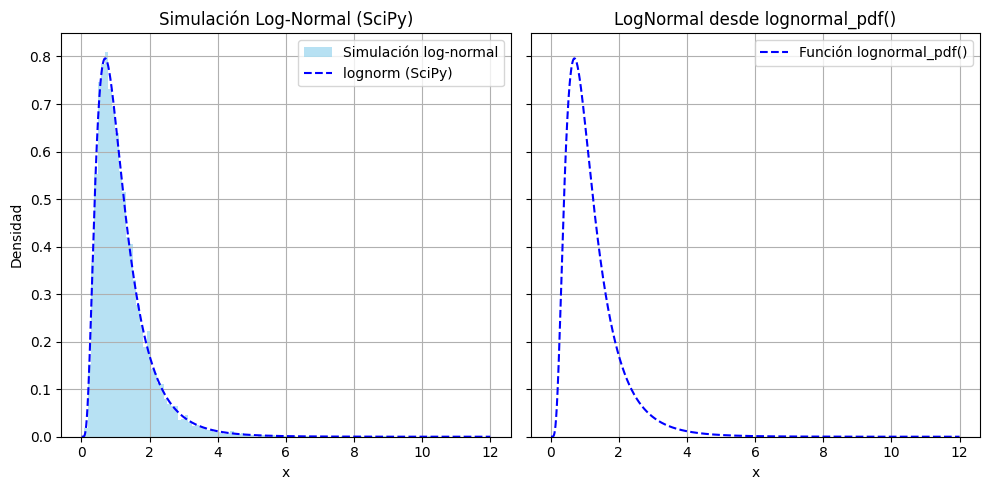

In [ ]:
# ----- Parámetros -----
mu=0
sigma = 0.6
x = np.random.lognormal(mean=mu, sigma=sigma, size=10000)

# Ejes x
x_vals_lognormal = np.linspace(0.01, 12, 10000)

# Densidades
lognormal_scipy = lognorm.pdf(x=x_vals_lognormal, s=sigma, scale=np.exp(mu))
lognormal_funcion_propia = lognormal_pdf(x=x_vals_lognormal, mu=mu, sigma=sigma)

# Calcular área bajo la curva
print(f"Área bajo la curva (lognormal_scipy): {simpson(lognormal_scipy, x_vals_lognormal):.6f}")
print(f"Área bajo la curva (lognormal_funcion_propia): {simpson(lognormal_funcion_propia, x_vals_lognormal):.6f}")

# ----- Crear subplots -----
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# 1. Histograma lognormal
axes[0].hist(x, bins=100, density=True, alpha=0.6, color="skyblue", label="Simulación log-normal")
axes[0].plot(x_vals_lognormal, lognormal_scipy, '--b', label="lognorm (SciPy)")
axes[0].set_title("Simulación Log-Normal (SciPy)")
axes[0].set_xlabel("x")
axes[0].legend()
axes[0].grid(True)

# 2. Log-normal con cambio de variable
axes[1].plot(x_vals_lognormal, lognormal_funcion_propia, '--b', label="Función lognormal_pdf()")
axes[1].set_title("LogNormal desde lognormal_pdf()")
axes[1].set_xlabel("x")
axes[1].legend()
axes[1].grid(True)

# Y-label solo en el primero
axes[0].set_ylabel("Densidad")

plt.tight_layout()
plt.show()

Área bajo la curva (normal_scipy): 0.999965
Área bajo la curva (lognormal_scipy): 0.999799
Área bajo la curva (lognormal_cambio_var): 0.999799
Área bajo la curva (lognormal_funcion_propia): 0.999799


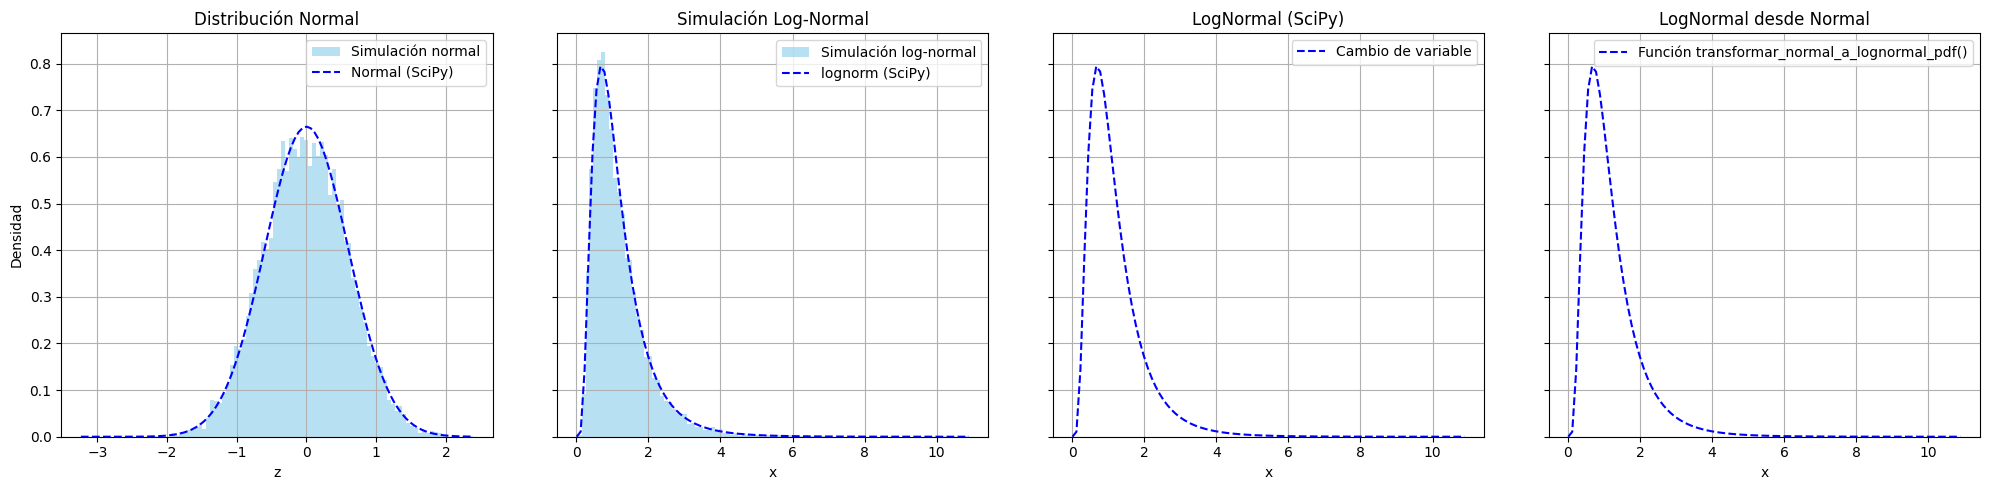

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy.integrate import simpson

# ----- Parámetros -----
mu = 0
sigma = 0.6
z = np.random.normal(loc=mu, scale=sigma, size=10000)
x = np.exp(z)

# Ejes x
x_vals_lognormal = np.linspace(0.01, np.max(x), 100)
x_vals_normal = np.linspace(np.min(z), np.max(z), 100)

# Densidades
normal_scipy = norm.pdf(x_vals_normal, loc=mu, scale=sigma)
lognormal_scipy = lognorm.pdf(x_vals_lognormal, s=sigma, scale=np.exp(mu))
lognormal_cambio_var = norm.pdf(np.log(x_vals_lognormal), loc=mu, scale=sigma) / x_vals_lognormal

lognormal_funcion_propia = transformar_normal_a_lognormal_pdf(x_vals_lognormal, mu, sigma)

# Calcular área bajo la curva
print(f"Área bajo la curva (normal_scipy): {simpson(normal_scipy, x_vals_normal):.6f}")
print(f"Área bajo la curva (lognormal_scipy): {simpson(lognormal_scipy, x_vals_lognormal):.6f}")
print(f"Área bajo la curva (lognormal_cambio_var): {simpson(lognormal_cambio_var, x_vals_lognormal):.6f}")
print(f"Área bajo la curva (lognormal_funcion_propia): {simpson(lognormal_funcion_propia, x_vals_lognormal):.6f}")

# ----- Crear subplots -----
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# 1. Histograma normal
axes[0].hist(z, bins=100, density=True, alpha=0.6, color="skyblue", label="Simulación normal")
axes[0].plot(x_vals_normal, normal_scipy, '--b', label="Normal (SciPy)")
axes[0].set_title("Distribución Normal")
axes[0].set_xlabel("z")
axes[0].legend()
axes[0].grid(True)

# 2. Histograma lognormal
axes[1].hist(x, bins=100, density=True, alpha=0.6, color="skyblue", label="Simulación log-normal")
axes[1].plot(x_vals_lognormal, lognormal_scipy, '--b', label="lognorm (SciPy)")
axes[1].set_title("Simulación Log-Normal")
axes[1].set_xlabel("x")
axes[1].legend()
axes[1].grid(True)

# 3. Log-normal con SciPy
axes[2].plot(x_vals_lognormal, lognormal_cambio_var, '--b', label="Cambio de variable")
axes[2].set_title("LogNormal (SciPy)")
axes[2].set_xlabel("x")
axes[2].legend()
axes[2].grid(True)

# 4. Log-normal con cambio de variable

axes[3].plot(x_vals_lognormal, lognormal_funcion_propia, '--b', label="Función transformar_normal_a_lognormal_pdf()")
axes[3].set_title("LogNormal desde Normal")
axes[3].set_xlabel("x")
axes[3].legend()
axes[3].grid(True)

# Y-label solo en el primero
axes[0].set_ylabel("Densidad")

plt.tight_layout()
plt.show()


---
---
si $ X \sim \text{LogNormal}(\mu, \sigma^2) $, entonces: $ \ln(X) \sim \mathcal{N}(\mu, \sigma^2) $

---

Área bajo la curva (lognormal): 0.999910
Área bajo la curva (normal): 0.999871


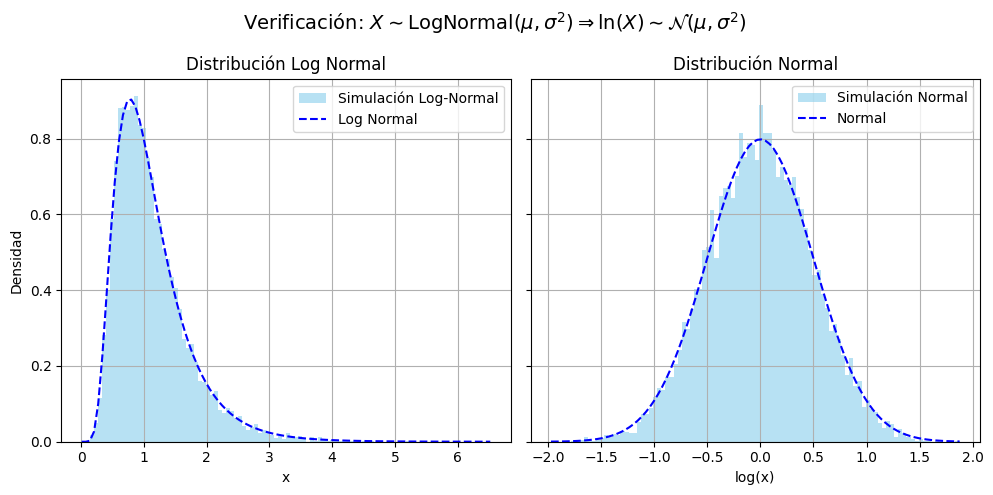

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy.integrate import simpson

# ----------------------------------------
# 🔁 Verificación de transformación: Log-Normal → Normal mediante logaritmo
# ----------------------------------------
# Si X ~ LogNormal(μ, σ²), entonces ln(X) ~ Normal(μ, σ²)
# 
# Este código:
# - Genera datos de una distribución Log-Normal
# - Aplica logaritmo a los datos simulados
# - Compara visualmente y calcula el área bajo la curva
# 
# ⚠️ No se usa el jacobiano porque no se está transformando la densidad directamente.
# En lugar de eso, transformamos los datos simulados (no la PDF).
# Por eso, NO hay que aplicar el factor 1/x del cambio de variable.
# ----------------------------------------

# ----- Parámetros -----
mu = 0
sigma = 0.5
x = np.random.lognormal(mean=mu, sigma=sigma, size=10000)
log_x = np.log(x)

# Ejes x
x_vals_lognormal = np.linspace(0.01, np.max(x), 100)
x_vals_normal = np.linspace(np.min(log_x), np.max(log_x), 100)

# Densidades
lognormal_dens = lognorm.pdf(x_vals_lognormal, scale=np.exp(mu), s=sigma)
normal_dens = norm.pdf(x_vals_normal, loc=mu, scale=sigma)

# Calcular área bajo la curva
print(f"Área bajo la curva (lognormal): {simpson(lognormal_dens, x_vals_lognormal):.6f}")
print(f"Área bajo la curva (normal): {simpson(normal_dens, x_vals_normal):.6f}")

# ----- Crear subplots -----
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# 1. Histograma lognormal
axes[0].hist(x, bins=100, density=True, alpha=0.6, color="skyblue", label="Simulación Log-Normal")
axes[0].plot(x_vals_lognormal, lognormal_dens, '--b', label="Log Normal")
axes[0].set_title("Distribución Log Normal")
axes[0].set_xlabel("x")
axes[0].legend()
axes[0].grid(True)

# 2. Histograma normal
axes[1].hist(log_x, bins=100, density=True, alpha=0.6, color="skyblue", label="Simulación Normal")
axes[1].plot(x_vals_normal, normal_dens, '--b', label="Normal")
axes[1].set_title("Distribución Normal")
axes[1].set_xlabel("log(x)")
axes[1].legend()
axes[1].grid(True)

# Y-label solo en el primero
axes[0].set_ylabel("Densidad")

fig.suptitle("Verificación: $X \\sim \\text{LogNormal}(\\mu, \\sigma^2) \\Rightarrow \\ln(X) \\sim \\mathcal{N}(\\mu, \\sigma^2)$", fontsize=14)

plt.tight_layout()
plt.show()


### 🔁 Relación entre la distribución normal y la log-normal

Si $Z \sim \mathcal{N}(\mu, \sigma^2)$, entonces:

$$
X = e^Z \sim \text{LogNormal}(\mu, \sigma^2)
$$

---

### 📌 ¿Cómo se relacionan sus densidades?

La función de densidad de $Z$ es:

$$
f_Z(z) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( -\frac{(z - \mu)^2}{2\sigma^2} \right)
$$

La densidad de $X = e^Z$ se obtiene aplicando la fórmula de cambio de variable en probabilidad:

> Si $X = g(Z)$ y $g$ es derivable, entonces:
> $$
> f_X(x) = f_Z(g^{-1}(x)) \cdot \left| \frac{d}{dx} g^{-1}(x) \right|
> $$

En nuestro caso:
- $g(z) = e^z \Rightarrow g^{-1}(x) = \ln(x)$
- $\frac{d}{dx} \ln(x) = \frac{1}{x}$

Entonces, la PDF de $X$ es:

$$
f_X(x) = \frac{1}{x} \cdot f_Z(\ln x)
$$

---

### ✅ Conclusión práctica

Aunque podríamos pensar que:
```python
lognormal_pdf(x, mu, sigma) == normal_pdf(np.log(x), mu, sigma)

esto es incorrecto, lo correcto es:

lognormal_pdf(x, mu, sigma) == normal_pdf(np.log(x), mu, sigma) / x


### 🧮 ¿Qué es el Jacobiano del cambio de variable?

Cuando transformamos una variable aleatoria continua mediante una función derivable y **estrictamente monótona**, su densidad se ajusta por un **factor de escala**: el **jacobiano**, que es simplemente el valor absoluto de la derivada del cambio de variable.

---

### 🔁 Aplicado a la log-normal

Si:
- $Z \sim \mathcal{N}(\mu, \sigma^2)$
- y definimos $X = e^Z$

entonces queremos encontrar la densidad de $X$.

---

#### 📌 Paso 1: Cambiar la variable

Queremos hallar $f_X(x)$ a partir de $f_Z(z)$.

Sabemos que si $X = g(Z)$, entonces:

$$
f_X(x) = f_Z(g^{-1}(x)) \cdot \left| \frac{d}{dx} g^{-1}(x) \right|
$$

---

#### 📌 Paso 2: Calcular la inversa y su derivada

Si $X = e^Z$, entonces su inversa es:

$$
Z = \ln X \quad \Rightarrow \quad g^{-1}(x) = \ln x
$$

La derivada de $\ln x$ es:

$$
\frac{d}{dx} \ln x = \frac{1}{x}
$$

---

#### 🧩 Paso 3: Sustituir en la fórmula

Entonces:

$$
f_X(x) = f_Z(\ln x) \cdot \left| \frac{1}{x} \right| = \frac{1}{x} \cdot f_Z(\ln x)
$$

---

### ✅ Resultado

La **densidad de la variable log-normal $X$** es:

$$
f_X(x) = \frac{1}{x \cdot \sigma \sqrt{2\pi}} \exp\left( -\frac{(\ln x - \mu)^2}{2\sigma^2} \right)
$$

> 🔎 El factor $\frac{1}{x}$ proviene del **jacobiano**, que ajusta la escala del espacio al cambiar de variable.

---

### 🧠 Intuición

Cuando transformamos una variable, su densidad también debe ajustarse para que **el área total siga siendo 1**. El jacobiano garantiza que esto se mantenga correcto en la nueva escala.
